<a href="https://colab.research.google.com/github/mishrark0145/datamining/blob/main/Data_Mining_Lab11_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
df

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,9424,2.604192,-0.569439,-2.279649,0.454424,-1.022478,-0.238800,0.448801,8,7,...,0.135295,-0.229590,0.815239,-1.427880,0.680367,-0.067251,1.185397,2.145775,0.399392,1.534014
9425,9425,-1.261178,-1.278394,0.863368,-0.256851,-0.378286,1.488378,-0.452990,5,15,...,0.002964,-0.419036,0.484244,0.904659,-0.318746,0.535457,-0.503099,-1.930459,-3.344948,-0.432526
9426,9426,1.944957,-0.380055,-0.221270,-0.365305,0.225235,-1.048178,0.382743,0,9,...,0.224985,-0.747229,1.142879,-0.105618,0.573486,-0.230865,0.225419,0.357502,2.964712,-0.419002
9427,9427,1.513336,-0.661539,0.541561,-0.873664,0.813718,0.873720,-1.540706,3,5,...,-0.230340,1.086515,-0.191154,-1.441422,-0.091726,-0.146795,-0.593535,-1.455666,0.016055,-0.090884


In [ ]:
# df.dropna(inplace=True)
df.fillna(df.mean(),inplace=True)
df.drop('id', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_df, columns=df.columns)

df_scaled.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.377795,-0.917273,0.637029,0.598541,-0.825883,0.741339,2.267848,-0.965077,1.506272,0.967903,...,-0.472792,-0.750635,-0.756024,-0.714010,0.905103,-0.679176,0.766315,0.964533,1.064014,0.680777
1,-0.677294,-0.460585,0.642198,1.006170,-1.648067,0.871255,-0.092026,-0.965077,-0.887969,-0.379658,...,-0.423251,-0.089594,-1.773191,-0.544807,0.448754,1.031604,-0.134658,-0.540552,0.371460,-1.583892
2,0.819385,0.314287,-1.163735,-0.619253,0.110363,0.791558,1.996362,-0.150007,1.027424,-0.548103,...,-0.408019,-1.588339,1.192080,2.224670,0.082577,-1.510311,-0.580624,0.983120,-0.915229,-2.199749
3,-0.489176,0.219216,0.256160,0.239762,0.419919,-1.209505,0.138516,0.121683,-1.127393,0.799458,...,0.623118,1.275614,0.536126,0.720435,-1.222750,0.825224,-1.170428,-0.386372,-0.100037,0.307967
4,-0.659332,-1.043420,-0.272586,-1.829257,-0.285185,-1.839736,0.784483,0.665062,0.069727,-0.548103,...,-1.621338,-0.431502,0.326495,0.213082,-1.487715,0.846863,-0.625053,1.169004,-0.372755,-1.134546


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3)
kmeans_cluster = kmeans.fit_predict(df_scaled)
df_scaled['Cluster'] = kmeans_cluster

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


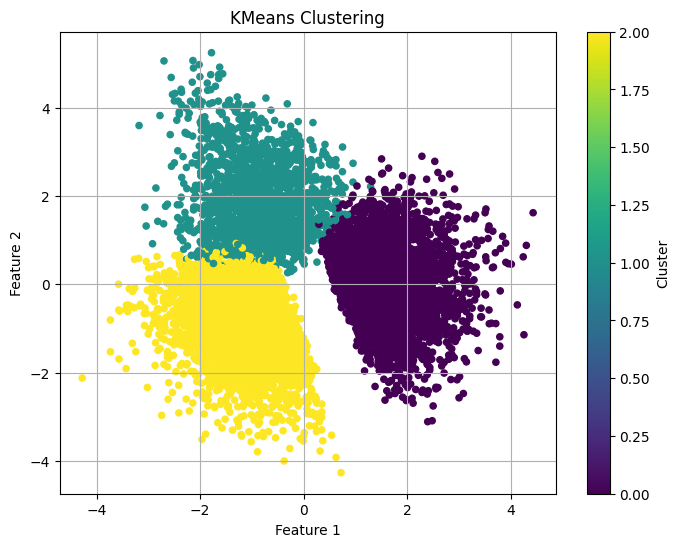

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_cluster, cmap='viridis', s=20)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

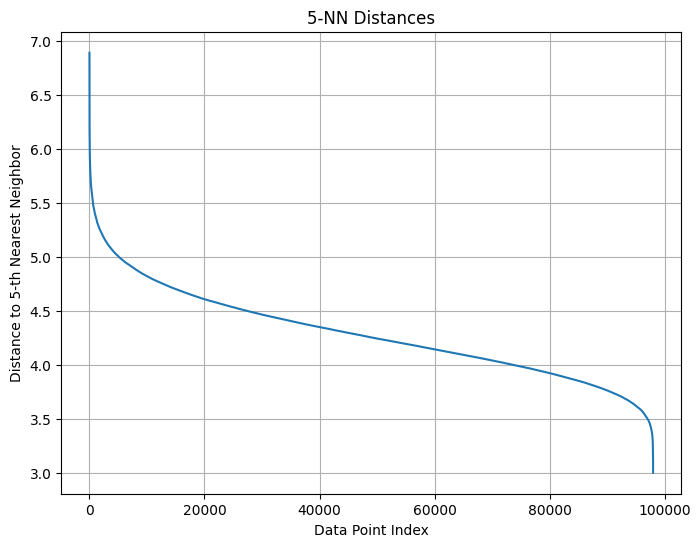

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Read your dataset (replace '/content/data.csv' with your actual file path)
df = pd.read_csv('/content/data.csv')

# Handle missing values (you can uncomment these lines if needed)
# df.fillna(df.mean(), inplace=True)
# df.dropna(inplace=True)

# Drop the 'id' column if needed (uncomment this line if 'id' is present)
# df.drop('id', axis=1, inplace=True)

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Initialize the Nearest Neighbors model (KNN for clustering)
# You can adjust the number of neighbors (n_neighbors) as needed
n_neighbors = 5  # Example: using 5 neighbors
knn_model = NearestNeighbors(n_neighbors=n_neighbors)
knn_model.fit(scaled_data)

# Find nearest neighbors and distances for each data point
distances, indices = knn_model.kneighbors(scaled_data)

# Plot the distances of nearest neighbors
plt.figure(figsize=(8, 6))
plt.plot(sorted(distances[:, n_neighbors-1], reverse=True))
plt.title(f'{n_neighbors}-NN Distances')
plt.xlabel('Data Point Index')
plt.ylabel(f'Distance to {n_neighbors}-th Nearest Neighbor')
plt.grid(True)
plt.show()
